# **1️⃣ What is Retrieval-Augmented Generation (RAG)?**
RAG is a hybrid approach that enhances text generation by incorporating external knowledge retrieval. Instead of solely relying on pre-trained model knowledge, RAG retrieves relevant documents from an external database and uses them to generate informed responses.

## **🔹 How Does RAG Work?**
1. Retrieve: Search a knowledge base (e.g., Wikipedia, Vector Databases) for relevant documents.
2. Augment: Provide retrieved documents as context to a generative model.
3. Generate: Use an LLM (e.g., GPT) to generate responses based on both the user query and retrieved documents.

# **2️⃣ Why Use RAG Instead of Fine-Tuning?**

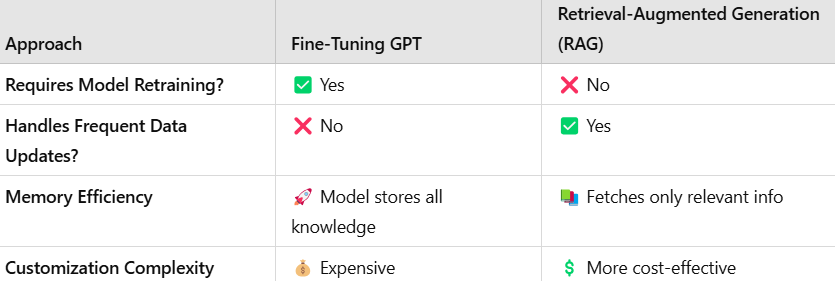

# **3️⃣ Applications of RAG Models**
📚 Question Answering → Answering factual questions using up-to-date knowledge.

💼 Enterprise Chatbots → Customer support with real-time policy retrieval.

📖 Legal & Financial Research → Summarizing documents dynamically.

🏥 Medical AI Assistants → Accessing latest research for diagnosis.

🔍 Fact-Checking Systems → Verifying information before generating responses.

# **4️⃣ RAG Model Architecture**
## **A standard RAG model has two main components:**

  1️⃣ Retriever → Fetches relevant documents.

  2️⃣ Generator → Uses retrieved data to generate text.


## **🔹 Common Retrieval Methods**
🔍 Vector Databases (e.g., FAISS, Pinecone, ChromaDB) → Finds semantically similar documents.

📚 Knowledge Graphs → Retrieves structured relationships.

📖 Traditional Search (BM25, ElasticSearch) → Uses keyword matching.

# **5️⃣ Implementing a RAG Model in Python**

In [1]:
!pip install langchain-core langchain-community langchain-openai chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.1 MB/s eta 0:00:0

In [1]:
import openai
from google.colab import userdata
import os


openai_api= userdata.get("OPENAI_API_KEY")

In [2]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [3]:
text = """
Dogs are popular pets. There are many breeds like Labrador, Poodle, and Beagle.
Dogs need regular exercise and proper nutrition.
Training is important for a dog's behavior.
Common commands include 'sit', 'stay', and 'come'.
"""

In [4]:
# 2. Split text
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)
splits = text_splitter.split_text(text)

In [6]:
# 3. Create simple vector store (in-memory)
embeddings = OpenAIEmbeddings(model="text-embedding-3-small",openai_api_key=openai_api)
vectorstore = Chroma.from_texts(splits, embeddings)
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

In [7]:
# 4. Create RAG chain
prompt = ChatPromptTemplate.from_template(
    """Answer using only this context:
    {context}

    Question: {question}
    Answer:"""
)

In [9]:
llm = ChatOpenAI(model="gpt-3.5-turbo",openai_api_key=openai_api)
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [10]:
# 5. Ask a question
question = "What are some common dog commands?"
print(rag_chain.invoke(question))

'sit', 'stay', and 'come'


# **6️⃣ Optimizing RAG Models**
✅ Use Better Retrievers → Vector databases (e.g., Pinecone, FAISS).

✅ Hybrid Search → Combine semantic and keyword-based search.

✅ Chunking Techniques → Split large documents for better retrieval.

✅ Fine-Tune the LLM → Improve response quality using domain-specific tuning.

✅ Use Reranking Models → Improve document relevance ranking.

# **7️⃣ Challenges & Considerations**
🔹 Latency → Fetching documents increases response time.

🔹 Knowledge Expansion → Large-scale databases may cause irrelevant retrieval.

🔹 Security & Privacy → Must handle sensitive document retrieval carefully.

🔹 Data Freshness → Ensure retrieved knowledge is up to date.